# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
!pip install citipy

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import api_key
import json
from pprint import pprint
from scipy import stats
import random
from citipy import citipy
import os as csv
import matplotlib.pyplot as plt


# Output File (CSV)
csvfile = "output/city_weather.csv"

#Base url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


In [21]:
# use random.seed to generate the same cities whenever we run cell
random.seed(30)

# Loop through range of 1500 
cities = []
for city in range(0, 1500):
#     Use random.uniform() to generate float instead of interger between longitude and latitude values
    longitude = random.uniform(-180, 180)
    latitude = random.uniform(-90, 90)
    city = citipy.nearest_city(latitude, longitude).city_name
    cities.append(city)

# Turn cities to dictionary to take out any repeating city, then turn to list again
cities = list(dict.fromkeys(cities))
print(cities)
print(longitude)
print(latitude)

['cape town', 'kapaa', 'castro', 'ponta do sol', 'lolua', 'leningradskiy', 'punta arenas', 'fort nelson', 'tumannyy', 'butaritari', 'hermanus', 'provideniya', 'kazalinsk', 'tubruq', 'belushya guba', 'atuona', 'iqaluit', 'mount gambier', 'mataura', 'causapscal', 'lagoa', 'puerto gaitan', 'mulege', 'roald', 'barrow', 'buala', 'klaksvik', 'kulachi', 'kuminskiy', 'namibe', 'taguatinga', 'udala', 'henties bay', 'beroroha', 'xiaoweizhai', 'grand river south east', 'alghero', 'saint george', 'rikitea', 'pisco', 'miyang', 'samusu', 'brae', 'attawapiskat', 'norman wells', 'ushuaia', 'ust-omchug', 'san patricio', 'illoqqortoormiut', 'torbay', 'ulaangom', 'ostrovnoy', 'itaituba', 'mar del plata', 'concarneau', 'kruisfontein', 'puerto ayora', 'busselton', 'kavaratti', 'matara', 'bani', 'srivardhan', 'port alfred', 'taolanaro', 'joppatowne', 'arraial do cabo', 'lensk', 'meulaboh', 'daru', 'gigmoto', 'albany', 'carnarvon', 'luderitz', 'prabumulih', 'port elizabeth', 'hilo', 'bull savanna', 'bambous 

In [22]:
# Print length of cities
len(cities)

602

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
city_two = []
cloudiness = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
country = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        time.sleep(1)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")
          

Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | ponta do sol
City not found. Skipping...
Processing Record 5 of Set 1 | leningradskiy
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | fort nelson
City not found. Skipping...
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | provideniya
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | mount gambier
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | causapscal
Processing Record 16 of Set 1 | lagoa
Processing Record 17 of Set 1 | puerto gaitan
Processing Record 18 of Set 1 | mulege
Processing Record 19 of Set 1 | roald
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | bu

Processing Record 36 of Set 4 | pevek
Processing Record 37 of Set 4 | kirakira
Processing Record 38 of Set 4 | bethel
Processing Record 39 of Set 4 | chokurdakh
Processing Record 40 of Set 4 | lebu
Processing Record 41 of Set 4 | erenhot
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | santa rosa
Processing Record 44 of Set 4 | tutoia
City not found. Skipping...
Processing Record 45 of Set 4 | atambua
Processing Record 46 of Set 4 | boa vista
Processing Record 47 of Set 4 | santiago del estero
Processing Record 48 of Set 4 | chegdomyn
Processing Record 49 of Set 4 | omihachiman
Processing Record 1 of Set 5 | viedma
Processing Record 2 of Set 5 | port-gentil
City not found. Skipping...
Processing Record 3 of Set 5 | patitirion
Processing Record 4 of Set 5 | cabo san lucas
Processing Record 5 of Set 5 | sangar
Processing Record 6 of Set 5 | shingu
Processing Record 7 of Set 5 | port hardy
Processing Record 8 of Set 5 | puerto ayacucho
Processing Record 9 of Set 

Processing Record 25 of Set 8 | rosetta
Processing Record 26 of Set 8 | kalemie
Processing Record 27 of Set 8 | okato
Processing Record 28 of Set 8 | poum
Processing Record 29 of Set 8 | yulara
Processing Record 30 of Set 8 | sinnamary
Processing Record 31 of Set 8 | aswan
Processing Record 32 of Set 8 | laguna
Processing Record 33 of Set 8 | mogok
Processing Record 34 of Set 8 | talnakh
City not found. Skipping...
Processing Record 35 of Set 8 | udon thani
Processing Record 36 of Set 8 | coquimbo
Processing Record 37 of Set 8 | kuraymah
Processing Record 38 of Set 8 | ipixuna
Processing Record 39 of Set 8 | aguimes
Processing Record 40 of Set 8 | torgau
Processing Record 41 of Set 8 | turukhansk
Processing Record 42 of Set 8 | palauig
Processing Record 43 of Set 8 | capelinha
Processing Record 44 of Set 8 | cockburn town
Processing Record 45 of Set 8 | carutapera
Processing Record 46 of Set 8 | baie-comeau
Processing Record 47 of Set 8 | huarmey
Processing Record 48 of Set 8 | wilming

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [53]:
index = range(0, len(city_two))
# Create dictionary with data collected
weather_dict = {"City": city_two, "Lat": lat, "Lng": lng, 
                "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness,
               "Wind Speed": wind_speed, "Country": country, "Date": date}
# Turn dictionary into dataframe
weather_df = pd.DataFrame(weather_dict, index=index)
weather_df.to_csv(csvfile, index=False)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-36.41,-71.90,50.00,81,95,9.17,CL,1600838272
1,kapaa,22.08,-159.32,80.60,69,40,13.87,US,1600838273
2,castro,-24.79,-50.01,50.88,86,75,11.21,BR,1600838066
3,ponta do sol,38.73,-28.27,64.18,85,97,23.62,PT,1600838276
4,leningradskiy,69.38,178.42,39.79,86,100,20.02,RU,1600838277
...,...,...,...,...,...,...,...,...,...
535,charters towers,38.57,-83.43,51.80,93,1,3.36,US,1600838897
536,odda,60.07,6.55,55.99,91,100,5.99,NO,1600838898
537,burnie,-41.07,145.92,55.99,57,71,15.01,AU,1600838899
538,muros,42.78,-9.06,63.00,92,84,4.00,ES,1600838900


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
# filter cities with humidity less than 100%
under_100 = weather_df[weather_df["Humidity"] < 100]
under_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-36.41,-71.90,50.00,81,95,9.17,CL,1600838272
1,kapaa,22.08,-159.32,80.60,69,40,13.87,US,1600838273
2,castro,-24.79,-50.01,50.88,86,75,11.21,BR,1600838066
3,ponta do sol,38.73,-28.27,64.18,85,97,23.62,PT,1600838276
4,leningradskiy,69.38,178.42,39.79,86,100,20.02,RU,1600838277
...,...,...,...,...,...,...,...,...,...
535,charters towers,38.57,-83.43,51.80,93,1,3.36,US,1600838897
536,odda,60.07,6.55,55.99,91,100,5.99,NO,1600838898
537,burnie,-41.07,145.92,55.99,57,71,15.01,AU,1600838899
538,muros,42.78,-9.06,63.00,92,84,4.00,ES,1600838900


In [26]:
#  Get the indices of cities that have humidity over 100%.
over_100 = weather_df.index[weather_df["Humidity"] > 100]
over_100

Int64Index([], dtype='int64')

In [28]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
clean_city_data = under_100[(np.abs(stats.zscore(under_100["Humidity"])) < 3)]
clean_city_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-36.41,-71.90,50.00,81,95,9.17,CL,1600838272
1,kapaa,22.08,-159.32,80.60,69,40,13.87,US,1600838273
2,castro,-24.79,-50.01,50.88,86,75,11.21,BR,1600838066
3,ponta do sol,38.73,-28.27,64.18,85,97,23.62,PT,1600838276
4,leningradskiy,69.38,178.42,39.79,86,100,20.02,RU,1600838277
...,...,...,...,...,...,...,...,...,...
535,charters towers,38.57,-83.43,51.80,93,1,3.36,US,1600838897
536,odda,60.07,6.55,55.99,91,100,5.99,NO,1600838898
537,burnie,-41.07,145.92,55.99,57,71,15.01,AU,1600838899
538,muros,42.78,-9.06,63.00,92,84,4.00,ES,1600838900


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

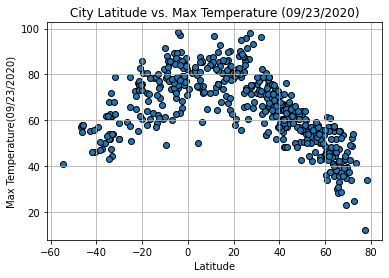

In [34]:
# Create scatter plot with edge color for plots
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], edgecolors="black")
# Title
plt.title("City Latitude vs. Max Temperature (09/23/2020)")
# y-axis label
plt.ylabel("Max Temperature(09/23/2020)")
# x-axis label
plt.xlabel("Latitude")
# Add grid to chart
plt.grid()
# show chart
plt.show()

In the above chart, I am analyzing the cities' maximum temperature (y axis) based on their latitude (x axis) using a scatter plot. As we can see, the closer the latitude is to zero (0) the higher the temperature. 

## Latitude vs. Temperature Plot

## Latitude vs. Humidity Plot

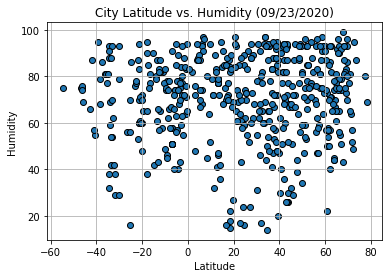

In [35]:
# Create scatter plot with edge color for plots
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], edgecolors="black")
# Title
plt.title("City Latitude vs. Humidity (09/23/2020)")
# y-axis label
plt.ylabel("Humidity")
# x-axis label
plt.xlabel("Latitude")
# Add grid to chart
plt.grid()
# show chart
plt.show()

Through the scatter plot above, I am analyzing the citie's humdity level (y axis) based on their latitude (x axis). Based on the result shown, there is little relation between latitude and humidity.

## Latitude vs. Cloudiness Plot

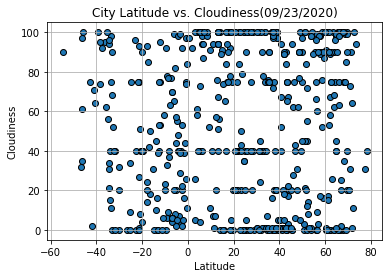

In [36]:
# Create scatter plot with edge color for plots
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], edgecolors="black")
# Title
plt.title("City Latitude vs. Cloudiness(09/23/2020)")
# y-axis label
plt.ylabel("Cloudiness")
# x-axis label
plt.xlabel("Latitude")
## Add grid to chart
plt.grid()
# show chart
plt.show()

I am using a scatter plot to determine the relationship between the cities'  level of cloudiness (y axis) and their latitude (x axis). I can see their latitude does not affect their level of cloudiness.

## Latitude vs. Wind Speed Plot

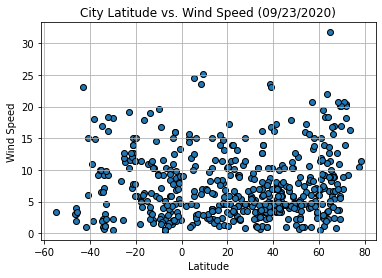

In [37]:
# Create scatter plot with edge color for plots
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], edgecolors="black")
# Title
plt.title("City Latitude vs. Wind Speed (09/23/2020)")
# y-axis label
plt.ylabel("Wind Speed")
# x-axis label
plt.xlabel("Latitude")
# Add grid to chart
plt.grid()
# show chart
plt.show()

Like the previous scatter plots, I am using pyplot to create my chart. In this scatter plot, I am analyzing the cities' wind speed (y axis) based on their latitude (x axis). Again, I am not seeing a relationship between the two. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8419796360879586


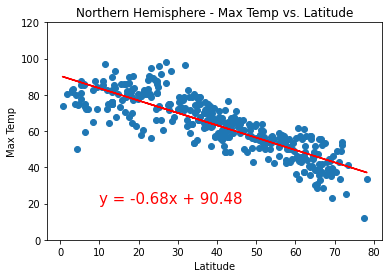

In [39]:
northern_hemisphere = clean_city_data[clean_city_data["Lat"] > 0]
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.ylim(0, 120)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemisphere["Lat"], 
                                                              northern_hemisphere["Max Temp"])
regress_value = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemisphere["Lat"], regress_value, 'r-')
plt.annotate(line_eq,(10, 20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7257200754102209


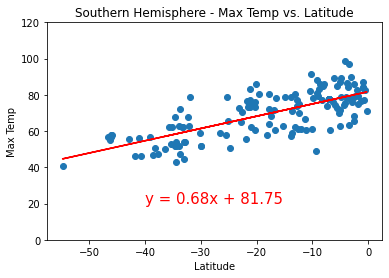

In [40]:
southern_hemisphere = clean_city_data[clean_city_data["Lat"] < 0]
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.ylim(0, 120)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemisphere["Lat"], 
                                                              southern_hemisphere["Max Temp"])
regress_value = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemisphere["Lat"], regress_value, 'r-')
plt.annotate(line_eq,(-40, 20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The two scatter plots I created separate the southern and northern hemisphere cities. In addition, the linear regression added help understand the relationship between latitude (x axis) and maximum temperature (y axis). As stated before, the closer the city's latitude is to zero, the higher the maximum temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03618646992695648


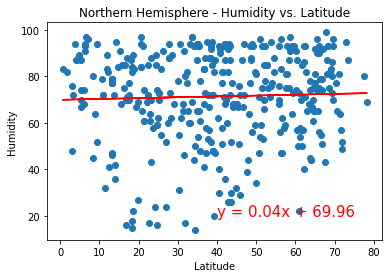

In [43]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemisphere["Lat"], 
                                                              northern_hemisphere["Humidity"])
regress_value = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemisphere["Lat"], regress_value, 'r-')
plt.annotate(line_eq,(40, 20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.010867257926046205


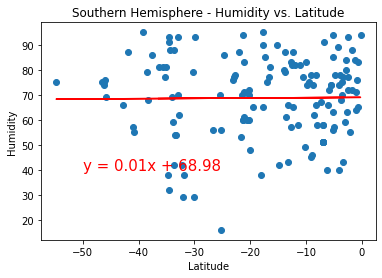

In [47]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemisphere["Lat"], 
                                                              southern_hemisphere["Humidity"])
regress_value = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemisphere["Lat"], regress_value, 'r-')
plt.annotate(line_eq,(-50, 40),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

I am doing the same to analyze the relationship between the cities' level of humdidity (y axis) and their latitude (x axis). I am still getting the same conclusion. There is not much relationship between the two fo them.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.06180967406882061


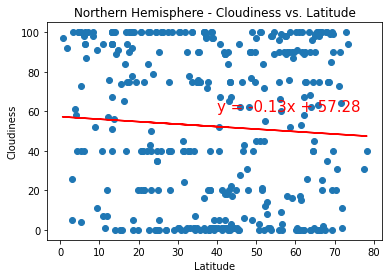

In [48]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemisphere["Lat"], 
                                                              northern_hemisphere["Cloudiness"])
regress_value = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemisphere["Lat"], regress_value, 'r-')
plt.annotate(line_eq,(40, 60),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.22577110324095256


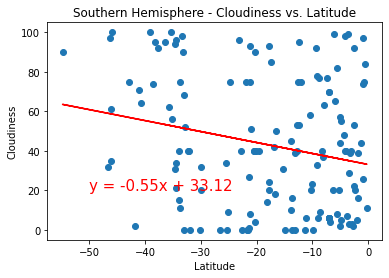

In [49]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemisphere["Lat"], 
                                                              southern_hemisphere["Cloudiness"])
regress_value = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemisphere["Lat"], regress_value, 'r-')
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

By separating the cities based on their latitude and adding a linear regression, I did find a relationship between their latitude and their level of cloudiness. As their latitude increases, their level of cloudiness decreases.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15709171572129618


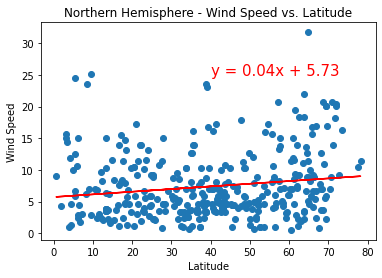

In [51]:
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemisphere["Lat"], 
                                                              northern_hemisphere["Wind Speed"])
regress_value = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hemisphere["Lat"], regress_value, 'r-')
plt.annotate(line_eq,(40, 25),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.09695816795466501


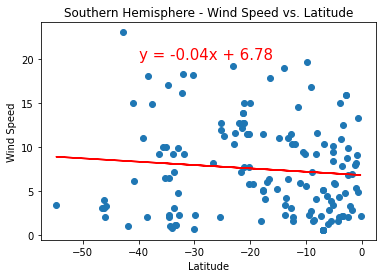

In [52]:
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemisphere["Lat"], 
                                                              southern_hemisphere["Wind Speed"])
regress_value = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hemisphere["Lat"], regress_value, 'r-')
plt.annotate(line_eq,(-40, 20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

The linear regression also helped me find the relationship between the cities's wind speed and their latitude. Wind speed decreases the closer the city's latitude is to zero.

3 observable trends from my data are:

-Cities with latitude closer to zero (or the equator) are hotter. The scatter plot shows that maximum temperatures increases as the citie's latitude are nearing zero (0).

-Cities' latitude does not influence their humdity level. All three scatter plots show that humidity stays stable throughout the chart.

-Cities with latitude closer to zero have lower wind speed. It's especially obvious in the northern and southern hemisphere plots and emphasized by the linear regression line. 